In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

- [x] Identify drug test results columns
- [x] Identify keys
- [ ] Identify other data (age)
- [ ] Identify sensitive column
- [ ] Identify results column

In [3]:
df = pd.read_csv("../data/raw/fairlabs_data.csv")

In [80]:
KEY_COLUMN_NAME = 'encounter_id'
ACTION_COLUMN_NAME = 'uds_order_id'
RESULTS_COLUMN_NAME = 'cps_reporting_date'

SENSITIVE_COLUMN_NAME = 'maternal_race'

COLOR = "#009999"

In [5]:
df.columns

Index(['encounter_id', 'delivery_date', 'mother_id', 'maternal_age',
       'maternal_race', 'uds_order_id', 'order_indication',
       'uds_collection_date', 'detected_6-acetylmorphine',
       'detected_7-aminoclonazepam', 'detected_alprazolam',
       'detected_amobarbital', 'detected_amphetamine',
       'detected_benzoylecgonine', 'detected_buprenorphine',
       'detected_buprenorphine glucuronide', 'detected_bupropion',
       'detected_clonidine', 'detected_cocaine', 'detected_codeine',
       'detected_eddp', 'detected_fentanyl', 'detected_gabapentin',
       'detected_hydrocodone', 'detected_hydromorphone',
       'detected_hydroxybupropion', 'detected_ketamine', 'detected_lsd',
       'detected_lorazepam', 'detected_lorazepam-glucuronide',
       'detected_methadone', 'detected_methamphetamine',
       'detected_methylbenzodioxolylbutanamine',
       'detected_methylenedioxyamphetamine',
       'detected_methylenedioxymethylamphetamine', 'detected_methylphenidate',
       'd

In [39]:
def find_columns_without_detected(columns):
    """
    Count the number of columns that do not contain the word "detected" in their names.

    Parameters:
        columns (list): List of column names.

    Returns:
        count (int): Number of columns without the word "detected".
    
    Author:
        Ruchi Chauhan
    """
    non_drug_cols = ["detected" not in col for col in columns]
    count = sum(non_drug_cols)
    return count, non_drug_cols

def find_key_candidates(df):
    possible_keys_list = []
    for col_name in df.columns:
        if len(set(df[col_name])) == len(df[col_name]):
            possible_keys_list.append(col_name)
    return possible_keys_list

In [40]:
print(f"Number of columns in the uploaded data: {len(df.columns)}")
print(f"Number of columns other than drug test results: {find_columns_without_detected(columns=df.columns)[0]}")
print(f"Number of unique encounters: {len(set(df.encounter_id))}")
print(f"Possible keys: {find_key_candidates(df)}")

Number of columns in the uploaded data: 55
Number of columns other than drug test results: 9
Number of unique encounters: 6643
Possible keys: ['encounter_id']


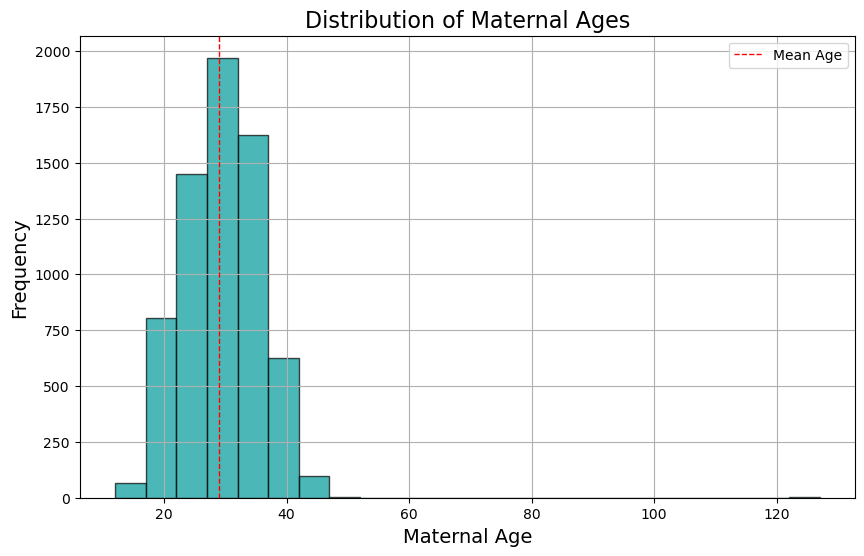

In [81]:
import matplotlib.pyplot as plt

def fancy_histogram(data, bin_size):
    """
    Create a fancy histogram.

    Parameters:
        data (array-like): Data to plot.
        bin_size (int): Size of bins.

    Returns:
        None
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create histogram
    ax.hist(data, bins=range(int(min(data)), int(max(data)) + bin_size, bin_size), color=COLOR, edgecolor='black', alpha=0.7)

    # Add title and labels
    ax.set_title('Distribution of Maternal Ages', fontsize=16)
    ax.set_xlabel('Maternal Age', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add grid
    ax.grid(True)

    # Add a vertical line at the mean
    ax.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)

    # Add a legend
    ax.legend(['Mean Age'], loc='upper right')

    # Show plot
    plt.show()

# Assuming df is your DataFrame and 'maternal_age' is the column of interest
bin_size = 5
fancy_histogram(df['maternal_age'], bin_size)
